<a href="https://colab.research.google.com/github/ItsMacto/ML-Models/blob/main/GPA-ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project: Students Performance Analysis**

This notebook walks through a machine learning project using the Students Performance Dataset from Kaggle. This is my first independent project, utilizing methods learned from Chapter 3 of my book. The goal is to explore the dataset, perform necessary preprocessing, and apply machine learning techniques to analyze student performance.

**Dataset Source:** [Students Performance Dataset on Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data)

## Download the data

We will load the Students Performance dataset from a local CSV file. Ensure the CSV file is in the working directory.

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import tarfile
import urllib.request

def loadData():
  # for now getting file may add download with api token later
  return pd.read_csv('StudentsPerformance.csv')

studentsPerformance = loadData()


## Explore Data
We will inspect the first few rows of the dataset, check for missing values, and convert relevant columns to appropriate data types. Additionally, we will generate summary statistics and visualizations to understand the distribution of the data.

In [ ]:
studentsPerformance.head()


StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3.042915         1.0  
2             0  0.112602         4.0  
3             0  2.054218         3.0  
4             0  1.288061         4.0

In [ ]:
studentsPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
print(studentsPerformance.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
# convert GradeClass to a int because it only has int values
studentsPerformance['GradeClass'] = studentsPerformance['GradeClass'].astype(np.int64)
studentsPerformance.info()
studentsPerformance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196           2  
1             0  3.042915           1  
2             0  0.112602           4  
3             0  2.054218           3  
4             0  1.288061           4

In [ ]:
studentsPerformance.describe()

StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000         1.000000   
50%           9.705363    15.000000     0.000000         2.000000   
75%          14.408410    22.000000     1.000000         3.000000   
max          19.978094    29.000000     1.000000         4.000000   

       Extracurricular       Sports        Music  Volunteering          GPA  \
count      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000   
mean          0.383361     0.303512     0.196906      0.157191     1.906186   
std           0.486307     0.459870     0.397744      0.364057     0.915156   
min           0.000000     0.000000     0.000000      0.000000     0.000000   
25%           0.000000     0.000000     0.000000      0.000000     1.174803   
50%           0.000000     0.000000     0.000000      0.000000     1.893393   
75%           1.000000     1.000000     0.000000      0.000000     2.622216   
max           1.000000     1.000000     1.000000      1.000000     4.000000   

        GradeClass  
count  2392.000000  
mean      2.983696  
std       1.233908  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       4.000000  
max       4.000000

## Visualize Data
We will create histograms to visualize the distribution of numerical features like Age, StudyTimeWeekly, and Absences. This helps in understanding the data distribution and identifying any outliers.

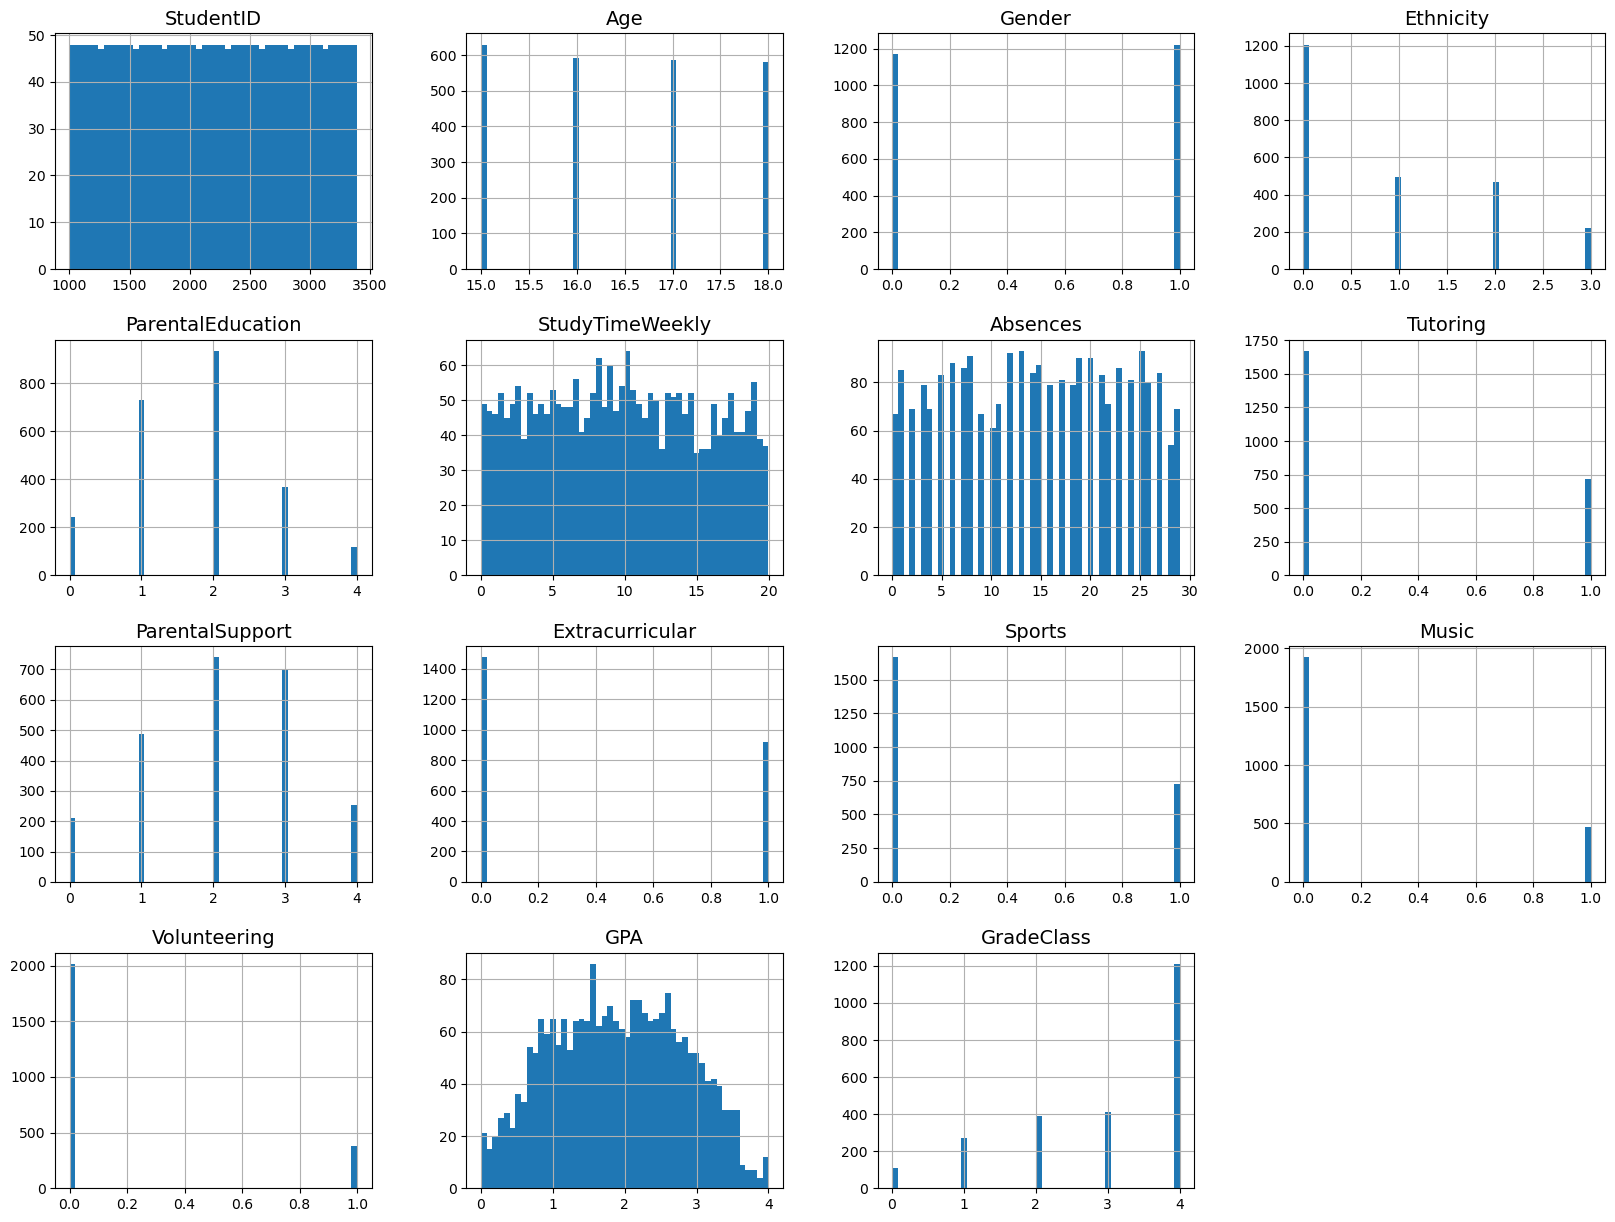

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

studentsPerformance.hist(bins=50, figsize=(20,15))
plt.show()

## **Step 4: Split Data**

We will split the data into training and testing sets. First, we'll use a random shuffle method to create these sets, and then we'll use stratified sampling to ensure that the proportions of the 'GradeClass' feature are consistent across the splits. This helps in creating a representative sample for training and evaluation.

In [ ]:
np.random.seed(42)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

trainSet, testSet = shuffle_and_split_data(studentsPerformance, 0.2)

print(len(trainSet), len(testSet), len(studentsPerformance))

1914 478 2392


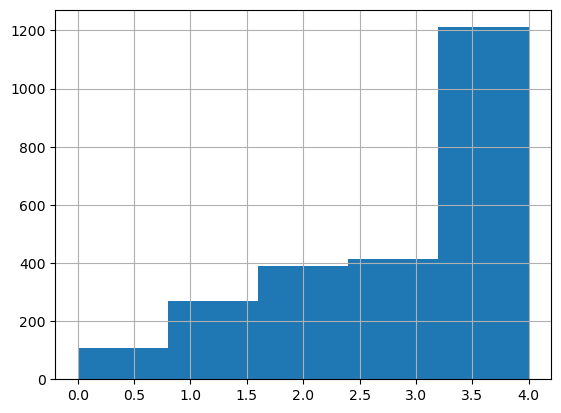

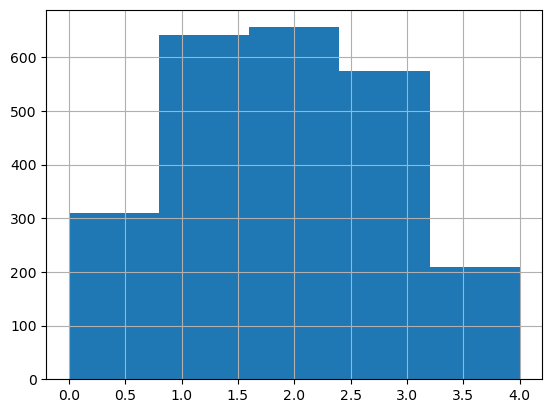

In [ ]:
studentsPerformance['GradeClass'].hist(bins=5)
plt.show()
studentsPerformance['GPA'].hist(bins=5)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    studentsPerformance, test_size=0.2, stratify=studentsPerformance["GradeClass"], random_state=42)

In [ ]:
def GradeClassProportions(data):
    return data["GradeClass"].value_counts() / len(data)

train_set, test_set = train_test_split(studentsPerformance, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": GradeClassProportions(studentsPerformance),
    "Stratified %": GradeClassProportions(strat_test_set),
    "Random %": GradeClassProportions(test_set),
}).sort_index()
compare_props.index.name = "GradeClass"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified %  Random %  Strat. Error %  Rand. Error %
GradeClass                                                                  
0                4.47          4.38      4.59           -1.99           2.67
1               11.25         11.27     10.23            0.25          -9.04
2               16.35         16.28     17.75           -0.38           8.56
3               17.31         17.33     17.95            0.12           3.73
4               50.63         50.73     49.48            0.20          -2.27

You can see that the stratified sampling set produces a training set that is more repersentive of the overall data

In [ ]:
studentsPerformance = strat_train_set.copy()


## Feature Engineering
First we take a look at the corralation. Then using knowledge of that will engineer some new columns with hopes of capturing different relationships

We will create new features to enhance our model:
- **ParentalCombined**: Interaction term between ParentalEducation and ParentalSupport.
- **Activities**: Sum of participation in Extracurricular, Sports, Music, and Volunteering.
- **StudyTime_ParentalSupport**: Interaction term between StudyTimeWeekly and ParentalSupport.

In [ ]:
corrMatrix = studentsPerformance.corr()
corrMatrix["GPA"].sort_values(ascending=False)

GPA                  1.000000
ParentalSupport      0.207327
StudyTimeWeekly      0.187819
Tutoring             0.151609
Extracurricular      0.082131
Music                0.069553
Sports               0.067569
Ethnicity            0.029078
Age                  0.013355
Volunteering         0.013215
StudentID           -0.009117
Gender              -0.010410
ParentalEducation   -0.051487
GradeClass          -0.784561
Absences            -0.921027
Name: GPA, dtype: float64

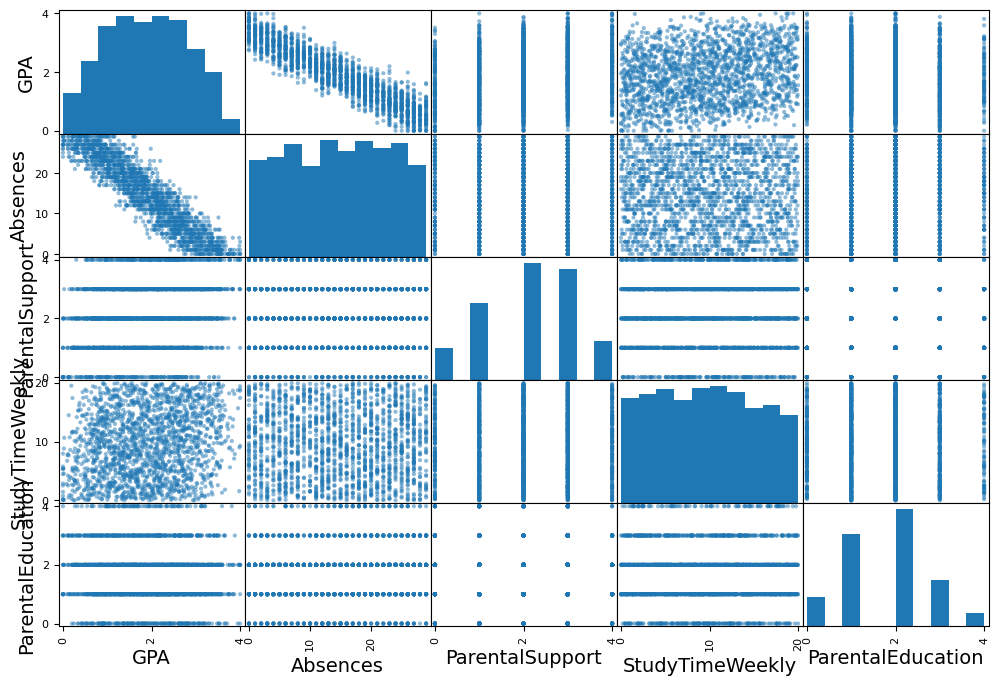

In [ ]:
from pandas.plotting import scatter_matrix

attributes = [ "GPA", "Absences","ParentalSupport","StudyTimeWeekly","ParentalEducation"]
scatter_matrix(studentsPerformance[attributes], figsize=(12, 8))
plt.show()

In [ ]:
studentsPerformance['ParentalCombined'] = (studentsPerformance['ParentalEducation'] + 1) * (studentsPerformance['ParentalSupport'] + 1)

studentsPerformance['activities'] = studentsPerformance['Extracurricular'] + studentsPerformance['Sports'] + studentsPerformance['Music'] + studentsPerformance['Volunteering']

studentsPerformance['StudyTime_ParentalSupport'] = studentsPerformance['StudyTimeWeekly'] * (studentsPerformance['ParentalSupport'])



Now these look pretty good. Lets prp the data next

In [ ]:
corrMatrix = studentsPerformance.corr()
corrMatrix["GPA"].sort_values(ascending=False)


GPA                          1.000000
StudyTime_ParentalSupport    0.250492
ParentalSupport              0.207327
StudyTimeWeekly              0.187819
Tutoring                     0.151609
activities                   0.121608
ParentalCombined             0.114674
Extracurricular              0.082131
Music                        0.069553
Sports                       0.067569
Ethnicity                    0.029078
Age                          0.013355
Volunteering                 0.013215
StudentID                   -0.009117
Gender                      -0.010410
ParentalEducation           -0.051487
GradeClass                  -0.784561
Absences                    -0.921027
Name: GPA, dtype: float64

### Data Preparation

In this step, we will prepare our dataset for training by separating the features and labels.

- `studentsPerformance`: This dataframe contains all the features after dropping the target variable (`GPA`), the grade class, and the student ID.
- `studentsPerformanceLabels`: This series contains the target variable (`GPA`), which we will use for training our model.


In [ ]:
studentsPerformance = strat_train_set.drop(["GPA", 'GradeClass', "StudentID"], axis=1)
studentsPerformanceLabels = strat_train_set["GPA"].copy()

We will visualize the distributions of the numeric columns in our dataset to understand their spread and characteristics.

It shows a uniform distribution meaning we dont need to scale the data

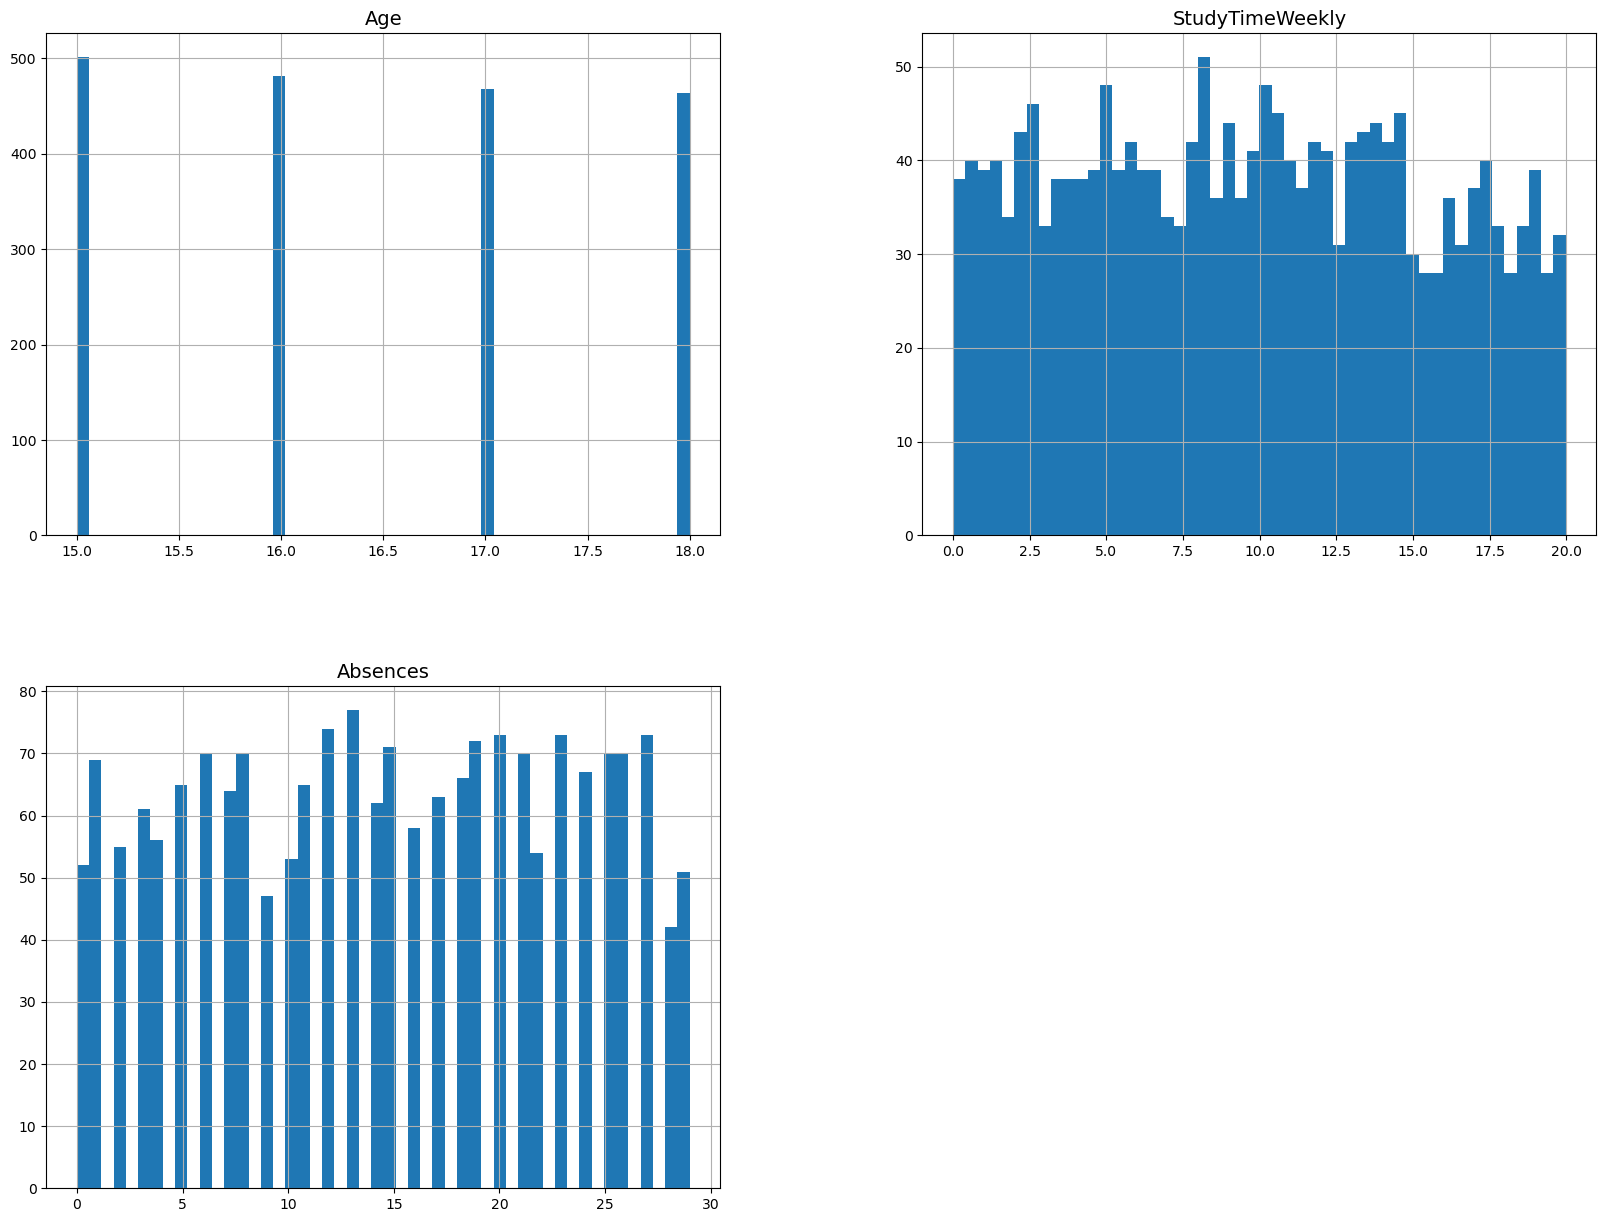

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


numeric_columns = studentsPerformance.get(['Age', 'StudyTimeWeekly', 'Absences'])

# Visualize distributions of numeric columns
numeric_columns.hist(bins=50, figsize=(20, 15))
plt.show()

Can see the data is uniformly distributed which we want

### Preprocessing

This code performs feature engineering and preprocessing on the dataset to prepare it for model training. It does the following:

1. **Import Libraries**: Necessary libraries for data manipulation and preprocessing are imported.
2. **Define Custom Functions**: Functions to create new features (`ParentalCombined`, `Activities`, `StudyTime_ParentalSupport`) are defined.
3. **Create Pipelines for Custom Features**: Pipelines are created to process and scale the custom features.
4. **Define Columns for Transformation**: Numerical, categorical, and custom feature columns are specified.
5. **Define Transformers**: Transformers for numerical and categorical features are created.
6. **Create Column Transformer**: All transformers are combined into a single `ColumnTransformer` to preprocess the dataset.
7. **Fit and Transform the Data**: The training data is fit and transformed using the defined preprocessing pipeline.
8. **Output**: The shape of the transformed data and the feature names are printed.

The output of the code:
- The transformed dataset has 1913 samples and 14 features.
- The feature names include the original features and the newly created features (`ParentalCombined`, `Activities`, `StudyTime_ParentalSupport`).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer


def parentalEducation_ParentalSupport(X):
    X = X.to_numpy()
    return (X[:, 0:1] + 1) * (X[:, 1:2] + 1)

def activities(X):
    X = X.to_numpy()
    return (X[:, 0:1] + X[:, 1:2] + X[:, 2:3] + X[:, 3:4])

def studytime_parentalsupport(X):
    X = X.to_numpy()
    return (X[:, 0:1] * X[:, 1:2])


# Function to name the new feature
def combined_name(function_transformer, feature_names_in):
    return ["ParentalCombined"]

def activities_name(function_transformer, feature_names_in):
    return ["Activities"]

def studytime_parentalsupport_name(function_transformer, feature_names_in):
    return ["StudyTime_ParentalSupport"]



# Pipelines for custom features
combined_pipeline = make_pipeline(
    FunctionTransformer(parental_combined, feature_names_out=combined_name),
    StandardScaler()
)

activities_pipeline = make_pipeline(
    FunctionTransformer(activities, feature_names_out=activities_name)
)

studytime_parentalsupport_pipeline = make_pipeline(
    FunctionTransformer(studytime_parentalsupport, feature_names_out=studytime_parentalsupport_name),
    StandardScaler()
)

# Define columns
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'ParentalEducation','ParentalSupport']
categorical_features = ['Ethnicity']
parental_features = ['ParentalEducation', 'ParentalSupport']
activities_features = ['Extracurricular', 'Sports', 'Music', 'Volunteering']
studytime_parentalsupport_features = ['StudyTimeWeekly', 'ParentalSupport']

# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Create the column transformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('parental', combined_pipeline, parental_features),
        ('activities', activities_pipeline, activities_features),
        ('studytime_parentalsupport', studytime_parentalsupport_pipeline, studytime_parentalsupport_features)
    ],
    remainder='passthrough'  # Leave other columns as they are
)


# Fit and transform the training data
studentsPerformancePrep = preprocessing.fit_transform(studentsPerformance)


print(studentsPerformancePrep.shape)
print(len(preprocessing.get_feature_names_out()))
print(preprocessing.get_feature_names_out())



(1913, 14)
14
['num__Age' 'num__StudyTimeWeekly' 'num__Absences'
 'num__ParentalEducation' 'num__ParentalSupport' 'cat__Ethnicity_0'
 'cat__Ethnicity_1' 'cat__Ethnicity_2' 'cat__Ethnicity_3'
 'parental__ParentalCombined' 'activities__Activities'
 'studytime_parentalsupport__StudyTime_ParentalSupport'
 'remainder__Gender' 'remainder__Tutoring']


### Model Training - Linear Regression

In this code, we are training a linear regression model to predict GPA based on various features from the dataset. By fitting the model to the training data, we aim to understand the relationship between the features and the target variable (GPA). The output shows the predicted GPA values for the first five samples and compares them to the actual GPA values.

The predictions are relatively close to the actual values, indicating that the model is capturing some of the underlying patterns in the data.


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(studentsPerformance, studentsPerformanceLabels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences',
                                                   'ParentalEducation',
                                                   'ParentalSupport']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Ethnicity']),
                                                 ('parental',
                                                  Pipe...
                                                   'Music', 'Volunteering']),
                                                 ('studytime_parentalsupport',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function studytime_parentalsupport_name at 0x337dd5d00>,
                                                                                       func=<function studytime_parentalsupport at 0x337e125c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'ParentalSupport'])])),
                ('linearregression', LinearRegression())])

In [ ]:
predictions = lin_reg.predict(studentsPerformance)
predictions[:5].round(2)

array([2.2 , 1.34, 0.33, 1.29, 0.46])

In [ ]:
studentsPerformanceLabels[:5].round(2)

653     2.04
200     1.64
1606    0.42
1032    1.59
1293    0.19
Name: GPA, dtype: float64

Showing the error in more detail

In [ ]:
import numpy as np

# Calculate error ratios for the first 5 predictions
error_ratios = predictions[:5] / studentsPerformanceLabels.iloc[:5].values - 1

# Convert ratios to percentage format
error_ratios_percent = [f"{100 * ratio:.2f}%" for ratio in error_ratios]

# Print the error ratios, rounded predictions, and actual values
print(", ".join(error_ratios_percent))
print("Predictions:", predictions[:5].round(2))
print("Actual labels:", studentsPerformanceLabels.iloc[:5].values)
print("Error ratios:", error_ratios)

7.90%, -18.22%, -22.67%, -18.76%, 139.17%
Predictions: [2.2  1.34 0.33 1.29 0.46]
Actual labels: [2.0395644  1.6434624  0.42399195 1.58628924 0.19262511]
Error ratios: [ 0.07899687 -0.1822179  -0.2266814  -0.18760321  1.39165784]


To evaluate the performance of our linear regression model, we calculate the Root Mean Squared Error (RMSE) between the predicted GPA values and the actual GPA values. The RMSE provides a measure of how well the model's predictions match the actual data, with lower values indicating better performance.

The RMSE for our model is approximately 0.21. This value suggests that, on average, the predicted GPA values deviate from the actual GPA values by about 0.21 points.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

lin_rmse = mean_squared_error(studentsPerformanceLabels, predictions,
                              squared=False)


r2 = r2_score(studentsPerformanceLabels, predictions)
print(r2)
lin_rmse

0.9499498405946354


0.20646662512514352

Lets try another model. This time using a Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(studentsPerformance, studentsPerformanceLabels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'StudyTimeWeekly',
                                                   'Absences',
                                                   'ParentalEducation',
                                                   'ParentalSupport']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Ethnicity']),
                                                 ('parental',
                                                  Pipe...
                                                 ('studytime_parentalsupport',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function studytime_parentalsupport_name at 0x337dd5d00>,
                                                                                       func=<function studytime_parentalsupport at 0x337e125c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['StudyTimeWeekly',
                                                   'ParentalSupport'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
predictions = tree_reg.predict(studentsPerformance)
predictions[:5].round(2)

array([2.04, 1.64, 0.42, 1.59, 0.19])

In [ ]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, studentsPerformance, studentsPerformanceLabels,
                              scoring="neg_root_mean_squared_error", cv=10)
lin_rmses = -cross_val_score(lin_reg, studentsPerformance, studentsPerformanceLabels,
                              scoring="neg_root_mean_squared_error", cv=10)

print(tree_rmses)
print(lin_rmses)

[0.32401168 0.32212862 0.35249462 0.32772589 0.33616498 0.34271736
 0.35743184 0.33820731 0.33809595 0.35279388]
[0.21236344 0.21178872 0.19758864 0.20695724 0.21280406 0.20423215
 0.20328737 0.21007901 0.2013307  0.21333927]


In [ ]:
print(pd.Series(tree_rmses).describe(), pd.Series(lin_rmses).describe())


count    10.000000
mean      0.339177
std       0.012345
min       0.322129
25%       0.329836
50%       0.338152
75%       0.350050
max       0.357432
dtype: float64 count    10.000000
mean      0.207377
std       0.005536
min       0.197589
25%       0.203524
50%       0.208518
75%       0.212220
max       0.213339
dtype: float64


Finaly one last model lets try

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42, ))
forest_rmses = -cross_val_score(forest_reg, studentsPerformance, studentsPerformanceLabels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [ ]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      0.237929
std       0.006455
min       0.226496
25%       0.233495
50%       0.239382
75%       0.240595
max       0.247105
dtype: float64

In [ ]:
forest_reg.fit(studentsPerformance, studentsPerformanceLabels)
predictions = forest_reg.predict(studentsPerformance)
forest_rmse = mean_squared_error(studentsPerformanceLabels, predictions,
                                 squared=False)
forest_rmse

0.08870567658800559

Thats pretty good but lets try to fine tune it to be better

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import joblib
from tqdm import tqdm

# Define the parameter grid
param_grid = {
    'random_forest__n_estimators': [100, 500, 1000],
    'random_forest__max_features': [3, 5, 7, 10, 'sqrt', 'log2'],
    'random_forest__max_depth': [None],
    'random_forest__min_samples_split': [2, 3, 5],
    'random_forest__min_samples_leaf': [1, 3],
    'random_forest__bootstrap': [True, False]
}


full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
# Set up GridSearchCV
grid_search = GridSearchCV(full_pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(studentsPerformance, studentsPerformanceLabels)

# Best parameters from grid search
best_params = grid_search.best_params_

print("Best parameters from grid search:", best_params)

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_

predictions = best_model.predict(studentsPerformance)
test_rmse = mean_squared_error(studentsPerformanceLabels, predictions, squared=False)
test_mae = mean_absolute_error(studentsPerformanceLabels, predictions)
test_r2 = r2_score(studentsPerformanceLabels, predictions)

print("RMSE with best model:", test_rmse)
print("MAE with best model:", test_mae)
print("R² with best model:", test_r2)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters from grid search: {'random_forest__bootstrap': True, 'random_forest__max_depth': None, 'random_forest__max_features': 7, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 3, 'random_forest__n_estimators': 1000}
RMSE with best model: 0.09344763510124722
MAE with best model: 0.07368187817731044
R² with best model: 0.9897472025595473


Length of feature importances: 14
Length of feature names: 14
Feature importances:
                                               Feature  Importance
2                                       num__Absences    0.825956
11  studytime_parentalsupport__StudyTime_ParentalS...    0.063994
1                                num__StudyTimeWeekly    0.029564
9                          parental__ParentalCombined    0.019761
10                             activities__Activities    0.017825
13                                remainder__Tutoring    0.014189
4                                num__ParentalSupport    0.007422
0                                            num__Age    0.006227
3                              num__ParentalEducation    0.005231
12                                  remainder__Gender    0.002504
5                                    cat__Ethnicity_0    0.002213
6                                    cat__Ethnicity_1    0.002055
7                                    cat__Ethnicity_2    0

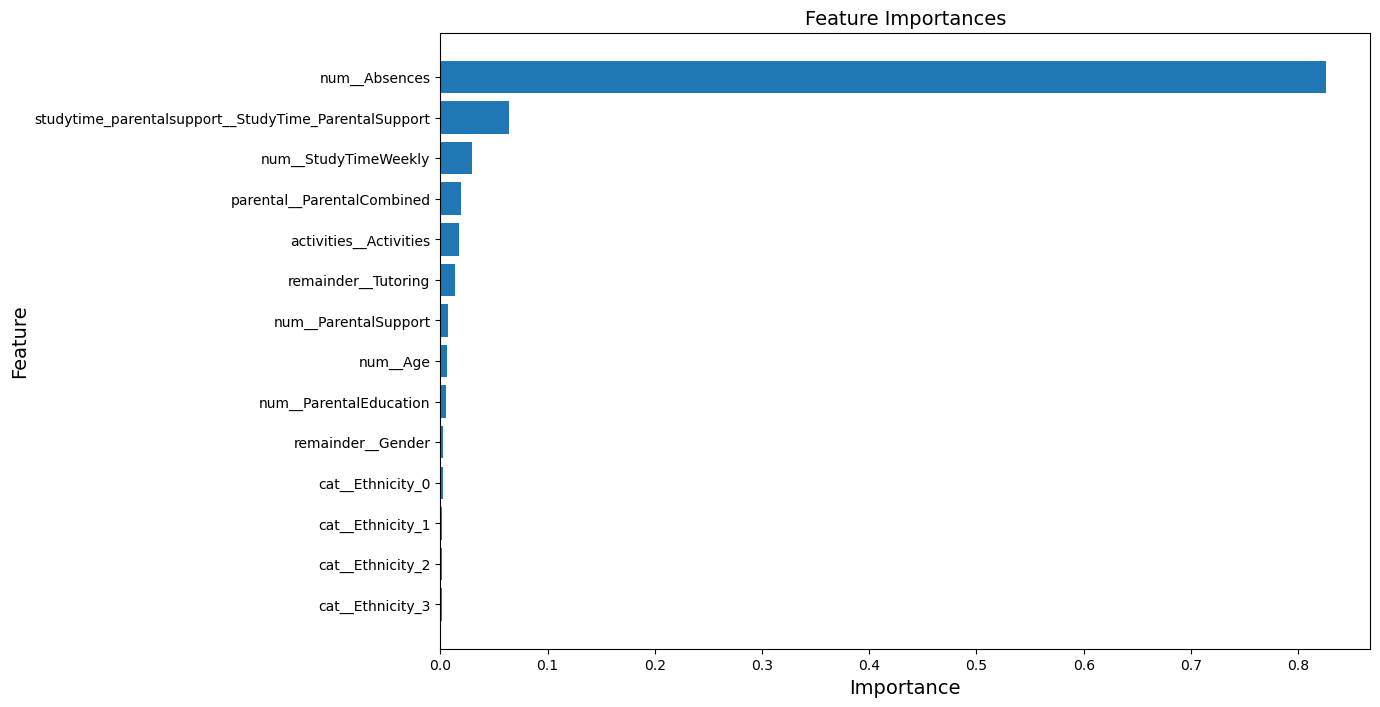

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract feature importances from the best model
feature_importances = best_model.named_steps['random_forest'].feature_importances_

# Get feature names from the preprocessing step
feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()
# feature_names = best_model.feature_names_in_

# Verify the lengths
print("Length of feature importances:", len(feature_importances))
print("Length of feature names:", len(feature_names))

# Ensure the lengths match
if len(feature_importances) == len(feature_names):
    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("Feature importances:\n", feature_importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("Mismatch between feature importances and feature names lengths.")

In [ ]:
# code to save models to compare

import csv
import os
from datetime import datetime
import joblib

def save_model_and_log(best_model, test_rmse, test_mae, test_r2, best_params, feature_importance_df, param_grid):
    # Save the best model with a timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"best_model_{timestamp}.joblib"
    joblib.dump(best_model, model_filename)
    print(f"Best model saved as {model_filename}")

    csv_filename = "model_comparison_log.csv"

    # Check if the CSV file already exists
    file_exists = os.path.isfile(csv_filename)

    # Open the CSV file in append mode
    with open(csv_filename, mode='a', newline='') as csv_file:
        writer = csv.writer(csv_file)

        # Write the header if the file does not exist
        if not file_exists:
            writer.writerow([
                "Timestamp", "Model Filename", "RMSE", "MAE", "R²", "Best Hyperparameters", "Feature Importances", "Hyperparameter Grid"
            ])

        # Write model details
        writer.writerow([
            timestamp,
            model_filename,
            test_rmse,
            test_mae,
            test_r2,
            best_params,
            feature_importance_df.to_dict('records'),
            param_grid
        ])

    print(f"Model details appended to {csv_filename}")

save_model_and_log(best_model, test_rmse, test_mae, test_r2, best_params, feature_importance_df, param_grid)


Best model saved as best_model_20240721_142602.joblib
Model details appended to model_comparison_log.csv


In [ ]:


studentsPerformance = strat_train_set.drop(["GPA", 'GradeClass', "StudentID", "Ethnicity"], axis=1)
studentsPerformanceLabels = strat_train_set["GPA"].copy()



def studytime_parentalsupport(X):
    X = X.to_numpy()
    return (X[:, 0:1] * X[:, 1:2])

def studytime_parentalsupport_name(function_transformer, feature_names_in):
    return ["StudyTime_ParentalSupport"]

studytime_parentalsupport_pipeline = make_pipeline(
    FunctionTransformer(studytime_parentalsupport, feature_names_out=studytime_parentalsupport_name)
)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'ParentalEducation','ParentalSupport']
studytime_parentalsupport_features = ['StudyTimeWeekly', 'ParentalSupport']

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('studytime_parentalsupport', studytime_parentalsupport_pipeline, studytime_parentalsupport_features)
    ],
    remainder='passthrough'
)


param_grid = {
    'random_forest__n_estimators': [100, 500, 1000],
    'random_forest__max_features': [3, 5, 10, 'sqrt', 'log2'],
    'random_forest__max_depth': [None],
    'random_forest__min_samples_split': [2, 3, 5, 7],
    'random_forest__min_samples_leaf': [1, 3],
    'random_forest__bootstrap': [True, False]
}



full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
# Set up GridSearchCV
grid_search = GridSearchCV(full_pipeline, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(studentsPerformance, studentsPerformanceLabels)

# Best parameters from grid search
best_params = grid_search.best_params_

print("Best parameters from grid search:", best_params)


save_model_and_log(grid_search.best_estimator_, test_rmse, test_mae, test_r2, best_params, feature_importance_df, param_grid)

best_model = grid_search.best_estimator_
predictions = best_model.predict(studentsPerformance)
test_rmse = mean_squared_error(studentsPerformanceLabels, predictions, squared=False)
test_mae = mean_absolute_error(studentsPerformanceLabels, predictions)
test_r2 = r2_score(studentsPerformanceLabels, predictions)

print("RMSE with best model:", test_rmse)
print("MAE with best model:", test_mae)
print("R² with best model:", test_r2)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters from grid search: {'random_forest__bootstrap': True, 'random_forest__max_depth': None, 'random_forest__max_features': 5, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 1000}
Best model saved as best_model_20240721_142832.joblib
Model details appended to model_comparison_log.csv
RMSE with best model: 0.084974303262044
MAE with best model: 0.06730162118541874
R² with best model: 0.9915222428501032


Now lets evaluate all the models

In [ ]:

testSet = strat_test_set.drop(["GPA", 'GradeClass',"StudentID","Ethnicity"], axis=1)
testSetLabels = strat_test_set["GPA"].copy()

grid_search = grid_search.best_estimator_

test_gs_predidictions = grid_search.predict(testSet)
test_gs_rmse = mean_squared_error(testSetLabels, test_gs_predidictions, squared=False)
test_gs_mae = mean_absolute_error(testSetLabels, test_gs_predidictions)
test_gs_r2 = r2_score(testSetLabels, test_gs_predidictions)

print("Test RMSE with grid search:", test_rmse)
print("Test MAE with grid search:", test_mae)
print("Test R² with grid search:", test_r2)



# new with ethnicity for other two models
testSet = strat_test_set.drop(["GPA", 'GradeClass',"StudentID"], axis=1)
testSetLabels = strat_test_set["GPA"].copy()

test_fr_predictions = forest_reg.predict(testSet)
test_fr_rmse = mean_squared_error(testSetLabels, test_fr_predictions, squared=False)
test_fr_mae = mean_absolute_error(testSetLabels, test_fr_predictions)
test_fr_r2 = r2_score(testSetLabels, test_fr_predictions)
print()
print("Test RMSE with forest regressor:", test_fr_rmse)
print("Test MAE with forest regressor:", test_fr_mae)
print("Test R² with forest regressor:", test_fr_r2)


test_lin_predictions = lin_reg.predict(testSet)
test_lin_rmse = mean_squared_error(testSetLabels, test_lin_predictions, squared=False)
test_lin_mae = mean_absolute_error(testSetLabels, test_lin_predictions)
test_lin_r2 = r2_score(testSetLabels, test_lin_predictions)
print()
print("Test RMSE with linear regression:", test_lin_rmse)
print("Test MAE with linear regression:", test_lin_mae)
print("Test R² with linear regression:", test_lin_r2)




Test RMSE with grid search: 0.084974303262044
Test MAE with grid search: 0.06730162118541874
Test R² with grid search: 0.9915222428501032

Test RMSE with forest regressor: 0.2526574205061396
Test MAE with forest regressor: 0.2014735203891156
Test R² with forest regressor: 0.917888740189303

Test RMSE with linear regression: 0.20830153743522836
Test MAE with linear regression: 0.1688006823565522
Test R² with linear regression: 0.9441885185607272
